# Bin Packing Lab

- Authors:
  - Author #1, email
  - Author #2, email
- Group ID on Avenue:
- Gitlab URL:

## How to use the provided code?

_(this section is just here for information, you can get rid of it in your own report)_

In [1]:
from macpacking.reader import DatasetReader, BinppReader
from macpacking.model  import Online, Offline
import macpacking.algorithms.offline as offline

Now that the business code is imported, we can load an existing dataset

In [2]:
dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt
  - Bin Capacity: 100
  - Objects to pack: [8, 8, 12, 13, 13, 14, 15, 17, 18, 19, 20, 23, 30, 37, 37, 39, 40, 43, 43, 44, 44, 50, 51, 61, 61, 62, 62, 63, 66, 67, 69, 70, 71, 72, 75, 76, 76, 79, 83, 83, 88, 92, 92, 93, 93, 97, 97, 97, 99, 100]


Acording to the `oracle.xslx` file, we now that the optimal solution for this case is to use _31_ bins. Let's call the baseline algorithm, which is an offline one, and see how it performs.

In [3]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


So the baseline finds the optimal solution. That's good news! Let's call our very own version of `NextFit`, as an offline algorithm.

In [4]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 35
[[8, 8, 12, 13, 13, 14, 15, 17], [18, 19, 20, 23], [30, 37], [37, 39], [40, 43], [43, 44], [44, 50], [51], [61], [61], [62], [62], [63], [66], [67], [69], [70], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


Damn it, this algorithm is 4 bins far from the optimal solution! Let's try an online version. Usually, they perform worst, so let's measure it.

In [5]:
strategy: Online = online.NextFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 36
[[13, 61], [15, 70], [19], [20, 23], [37, 43, 14], [39], [40, 8, 18], [43], [44], [44, 50], [51, 30], [61], [62], [62, 37], [63, 17, 13], [66], [67], [69], [71], [72], [75], [76], [76, 8, 12], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


As expected, the online version is worst!

Running KPI benching for online algorithms:
running bench
going to show


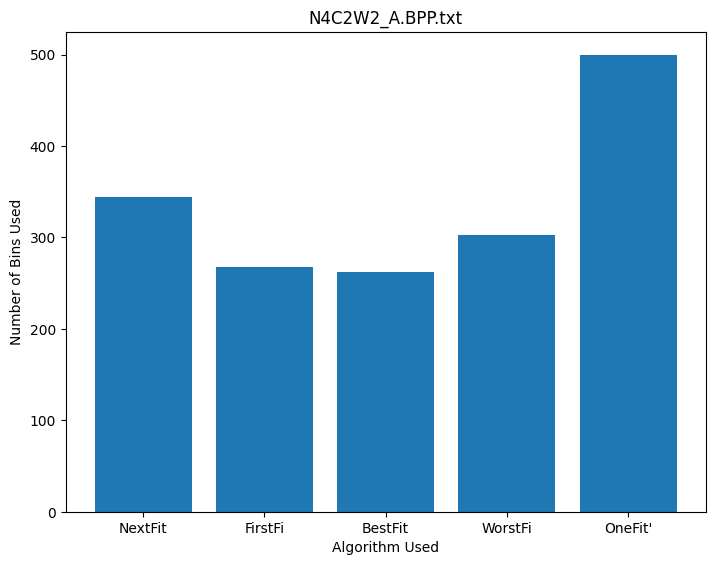

going to show


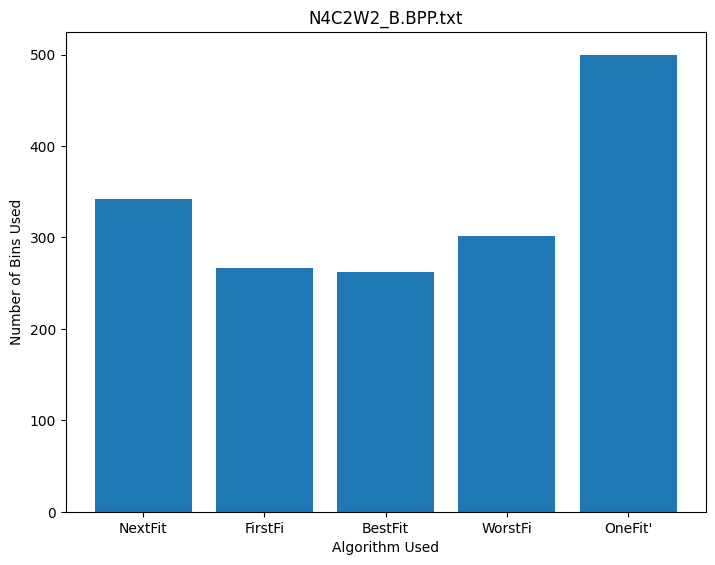

going to show


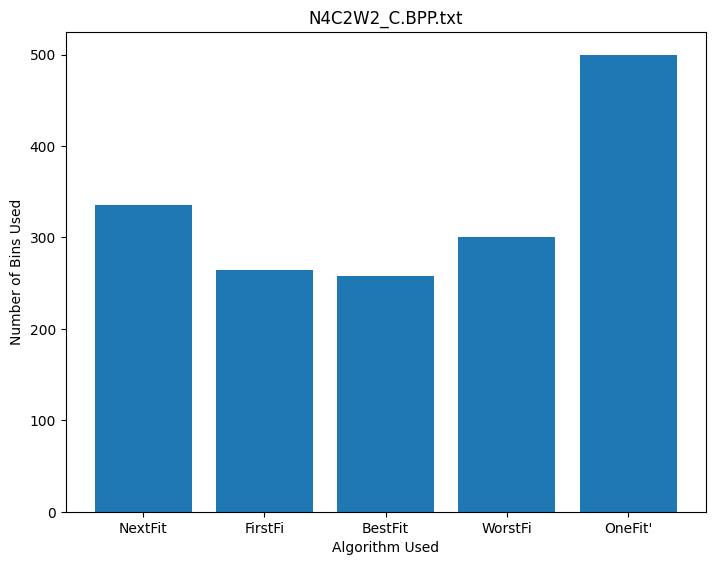

going to show


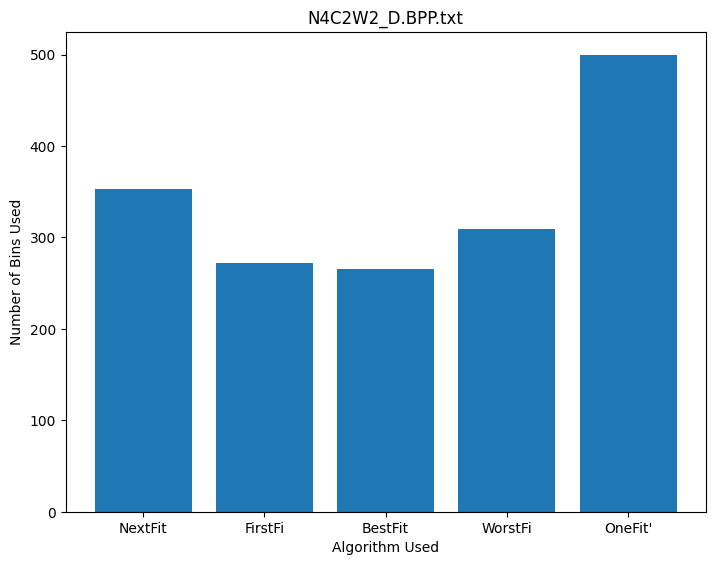

going to show


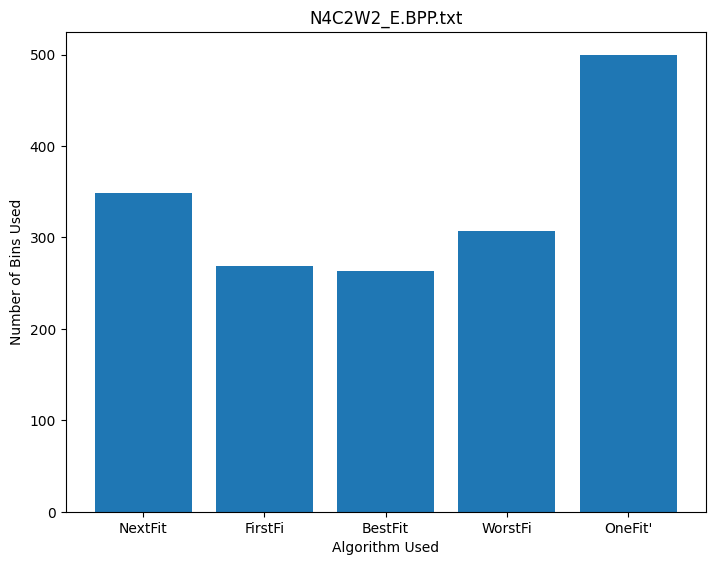

going to show


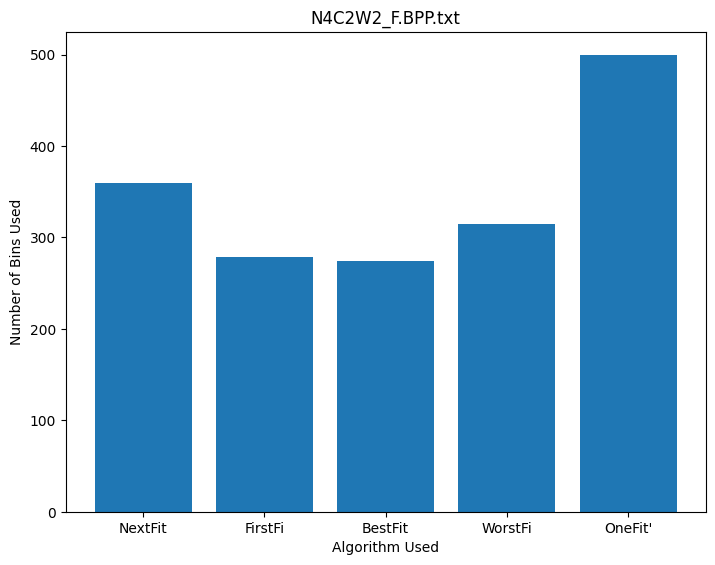

going to show


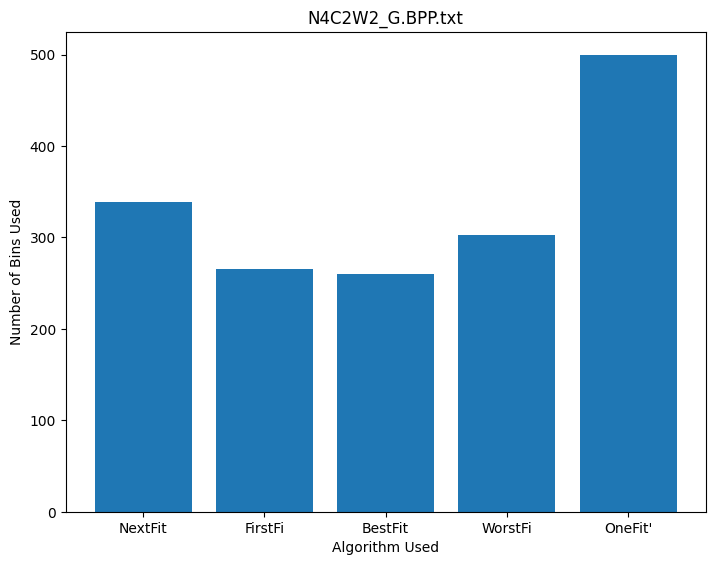

going to show


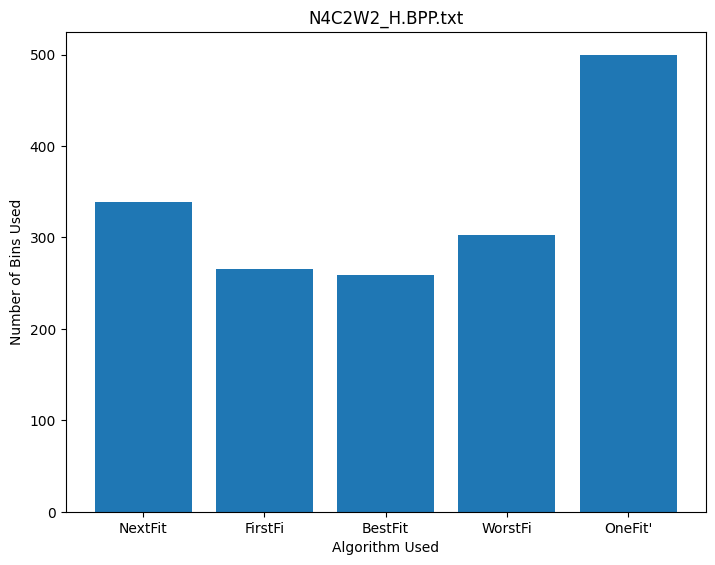

going to show


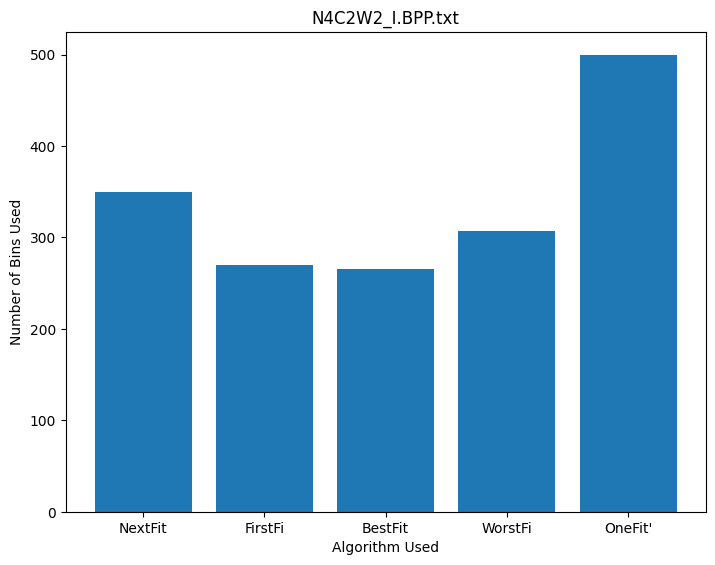

going to show


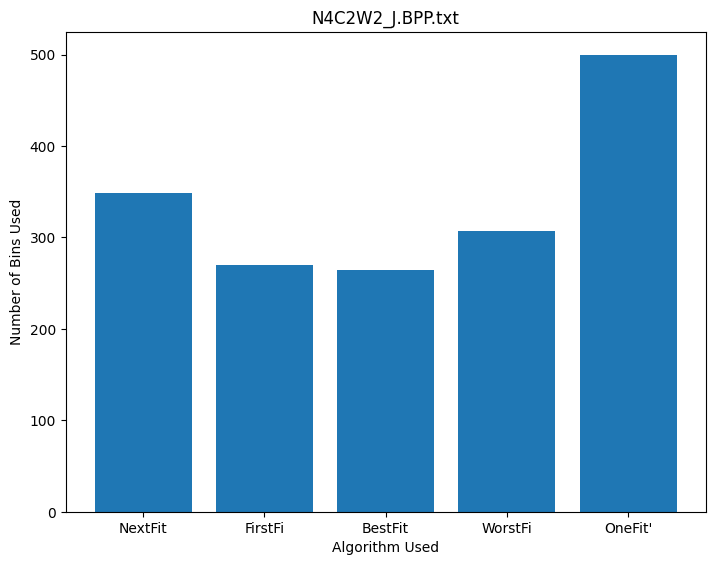

going to show


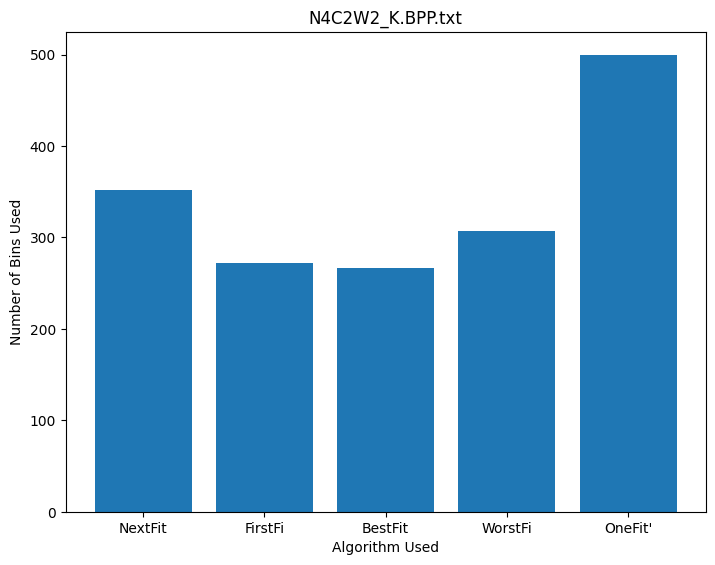

going to show


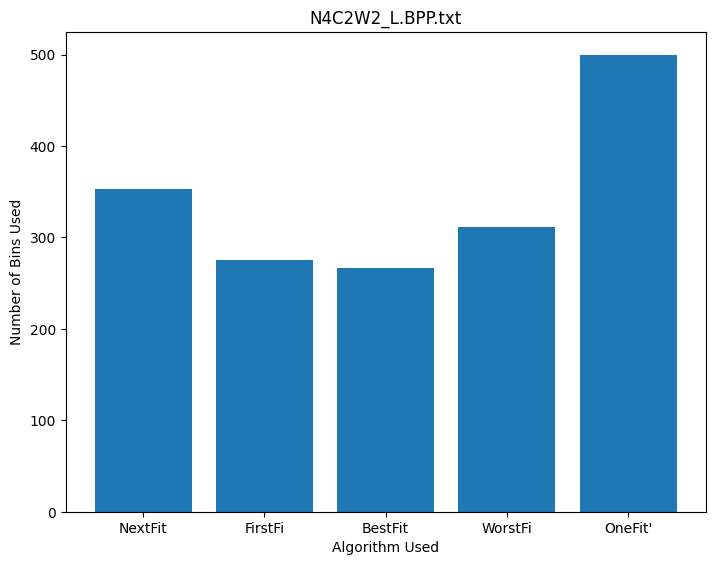

going to show


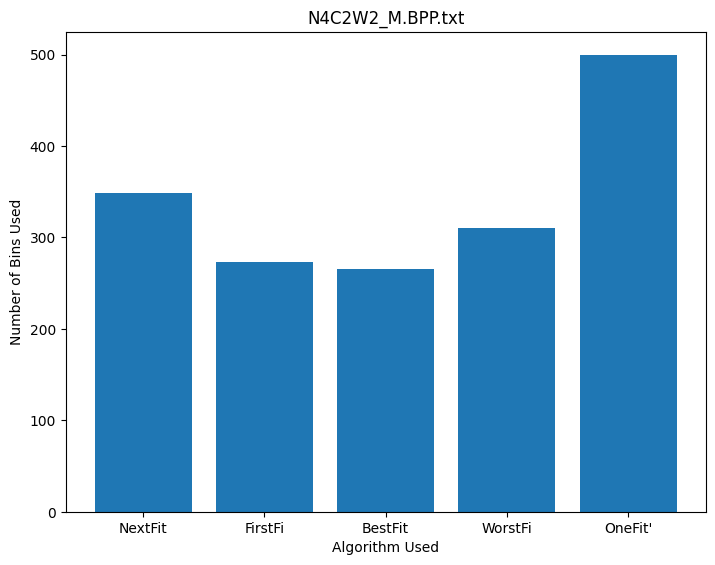

going to show


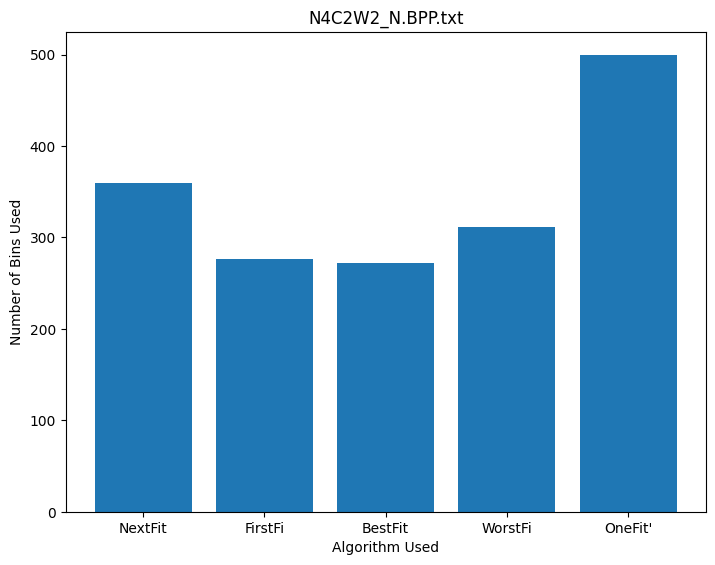

going to show


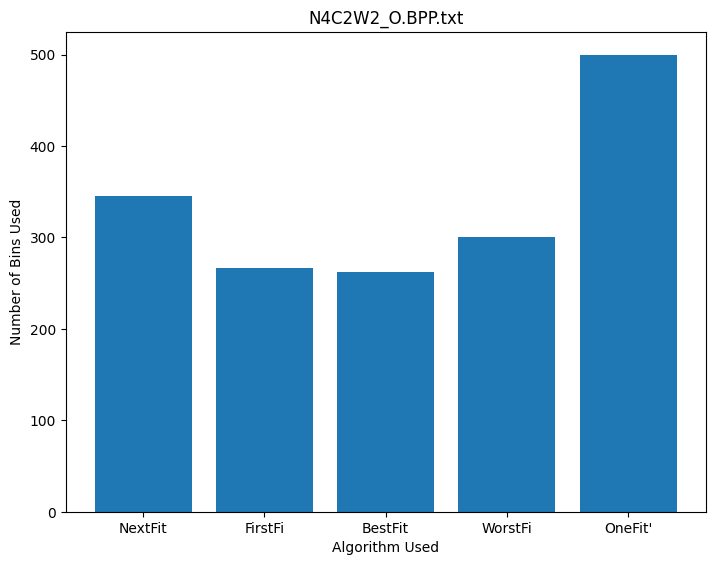

going to show


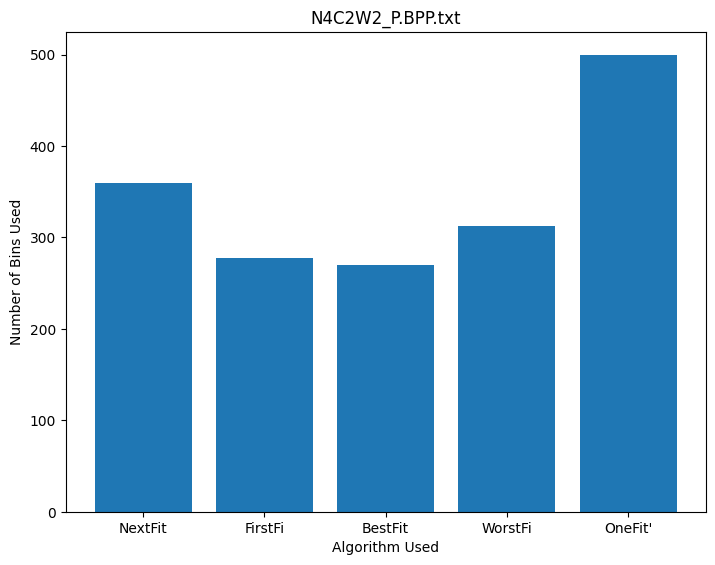

going to show


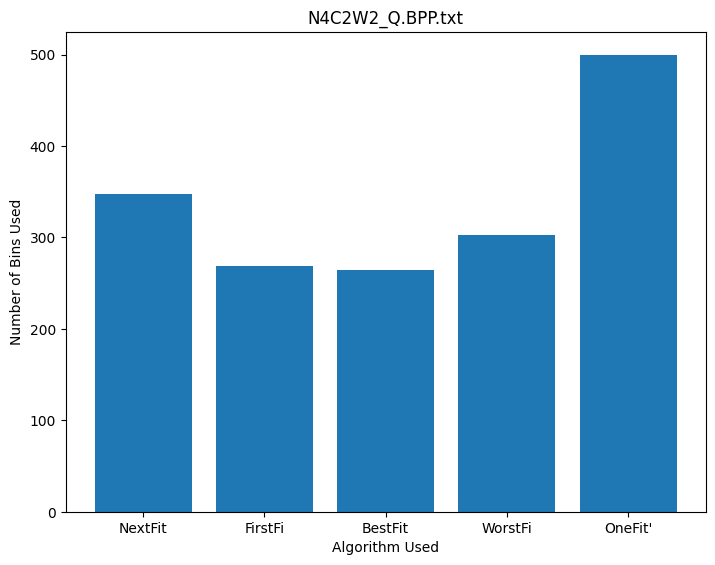

going to show


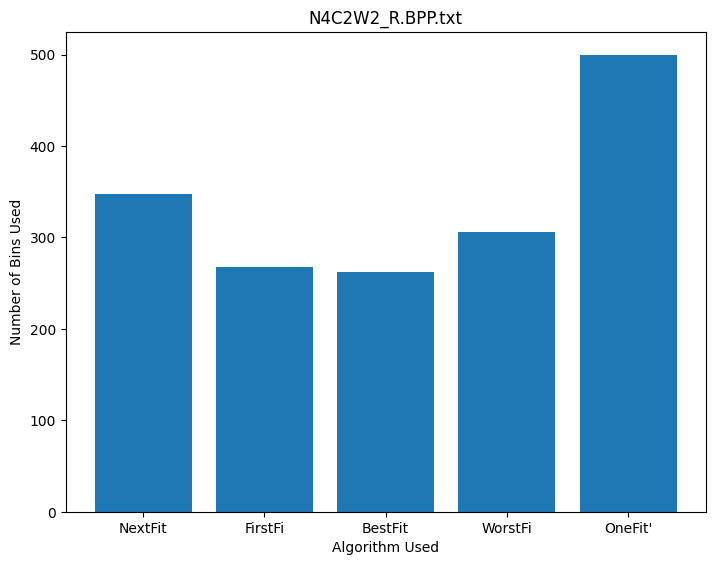

going to show


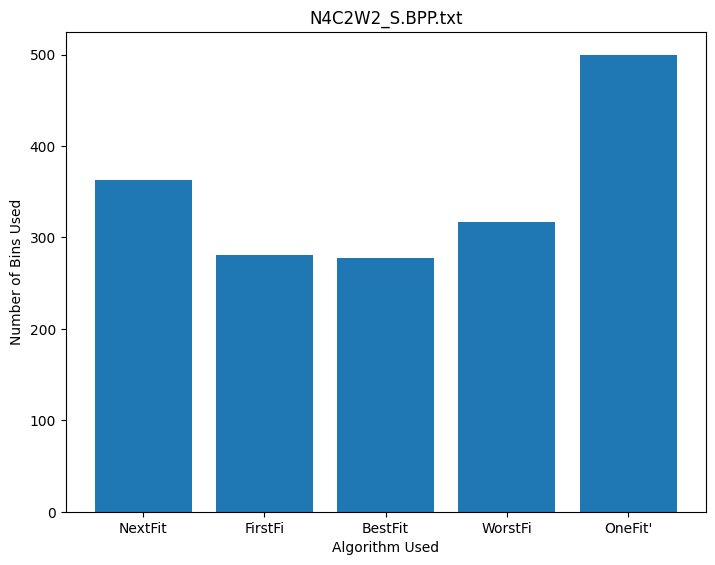

going to show


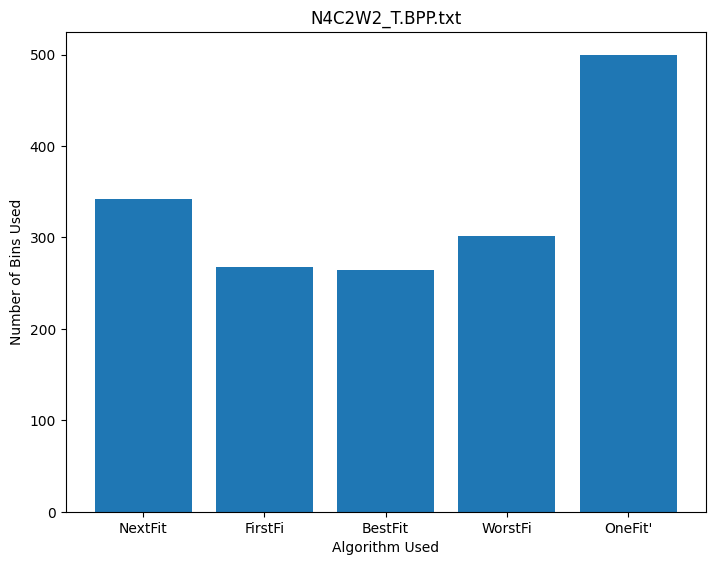

Running KPI benching for offline algorithms:
running bench
going to show


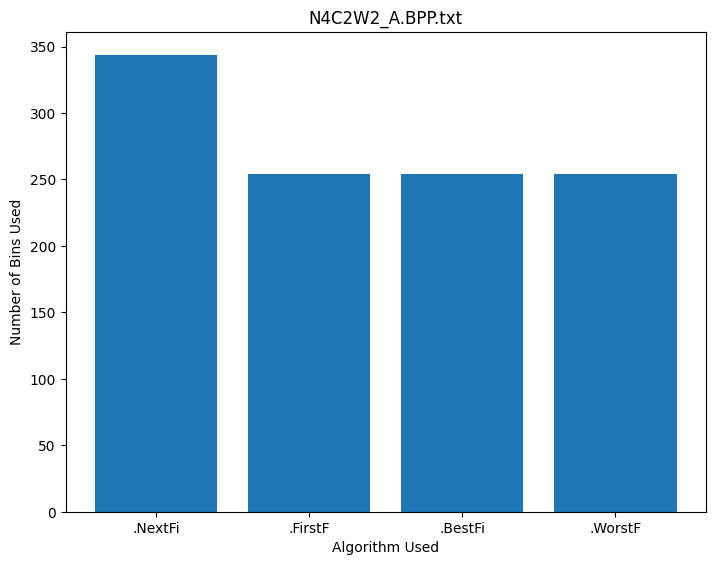

going to show


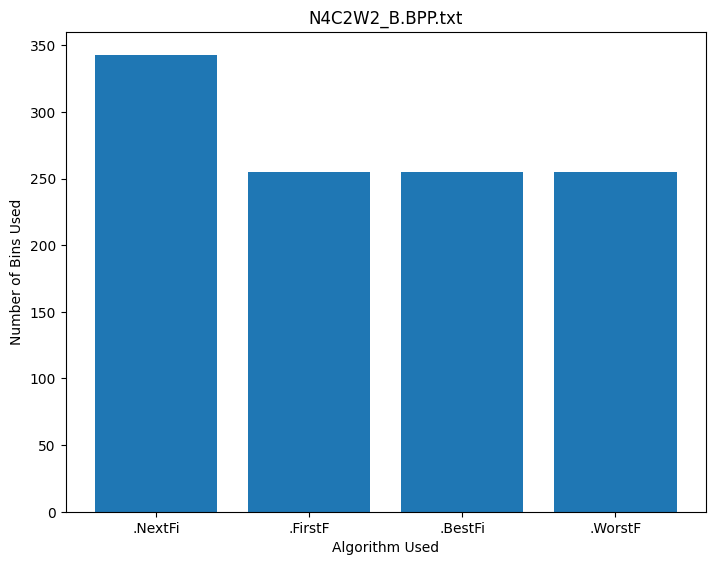

going to show


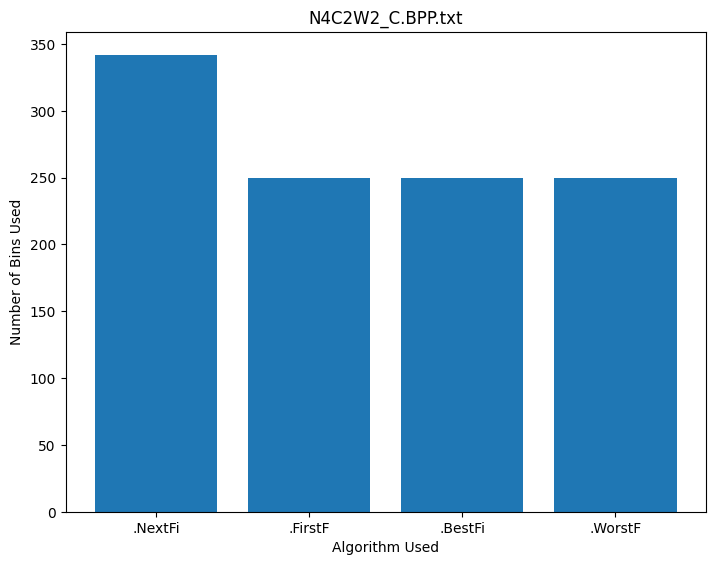

going to show


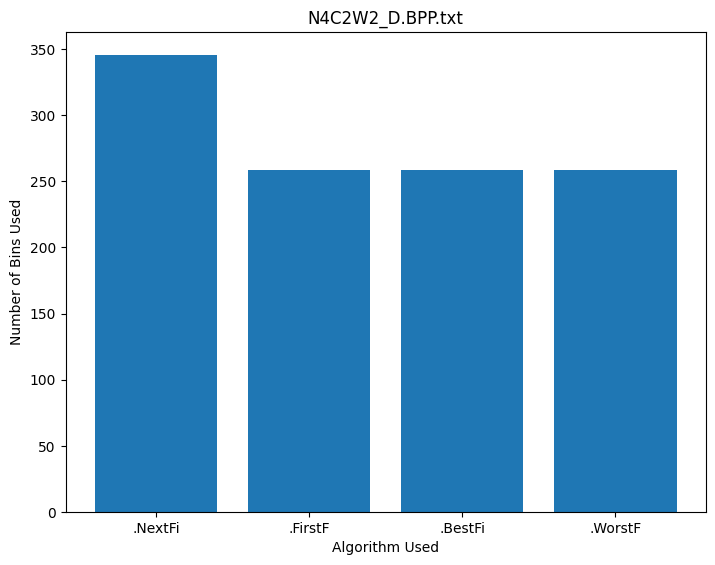

going to show


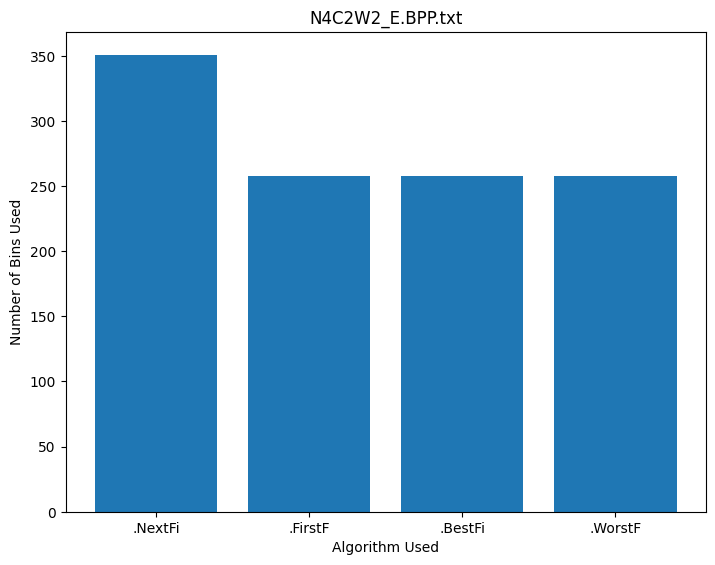

going to show


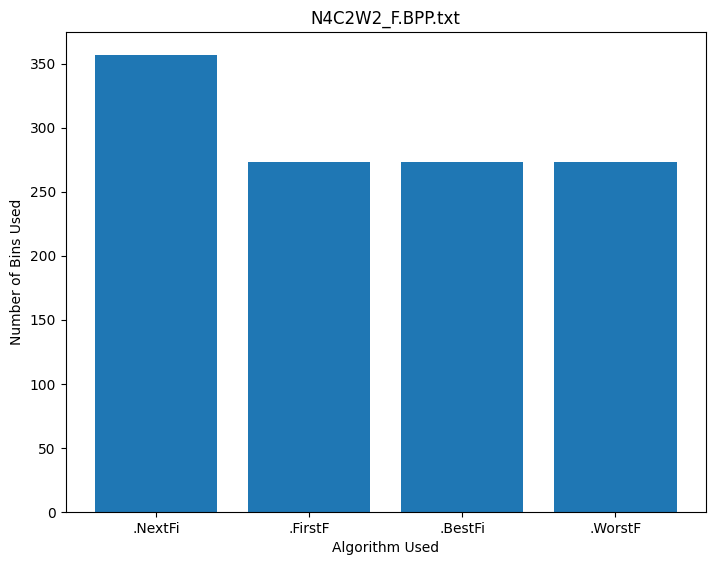

going to show


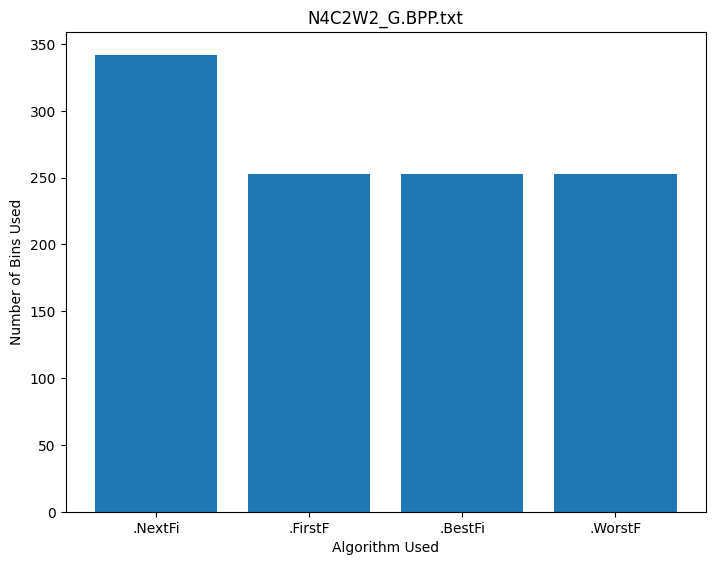

going to show


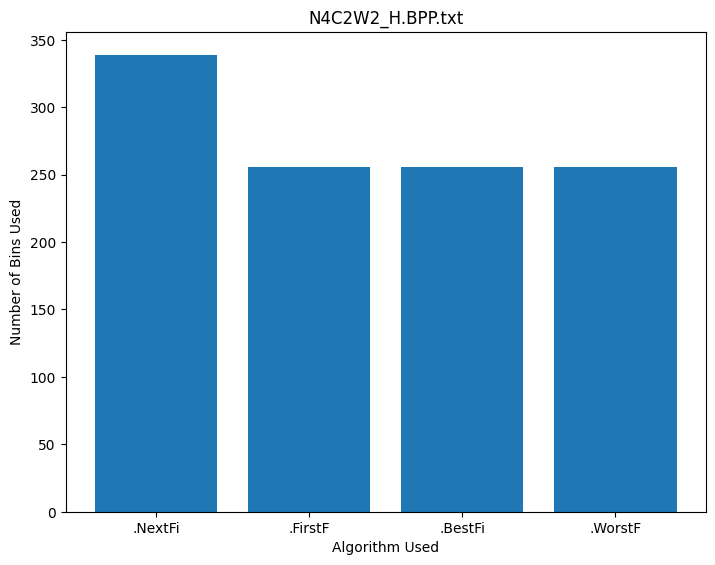

going to show


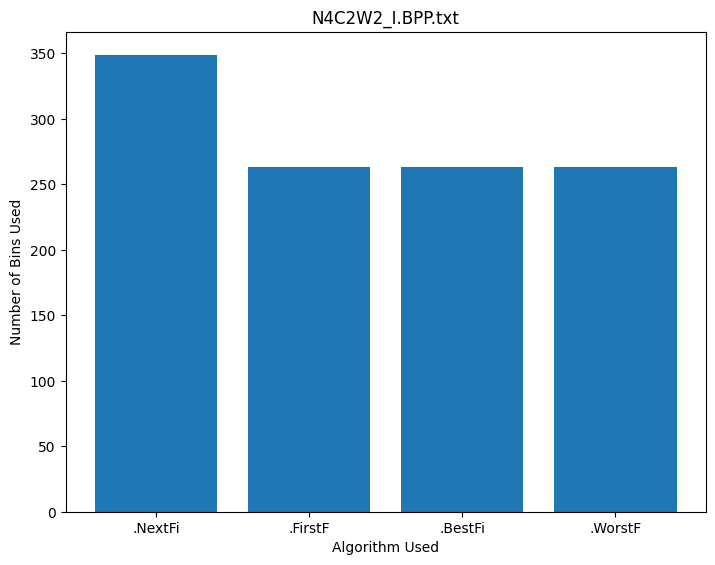

going to show


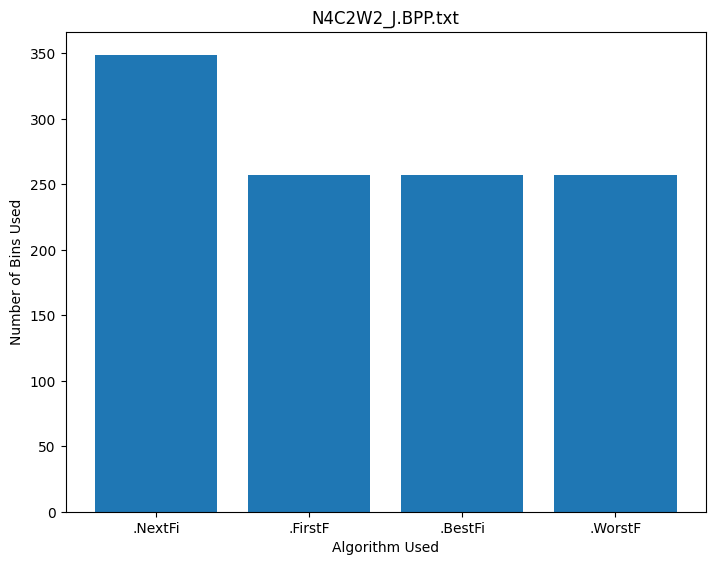

going to show


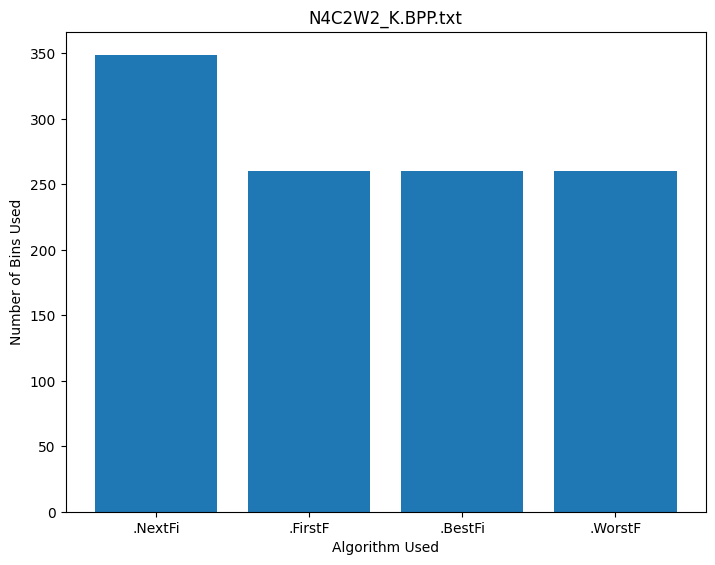

going to show


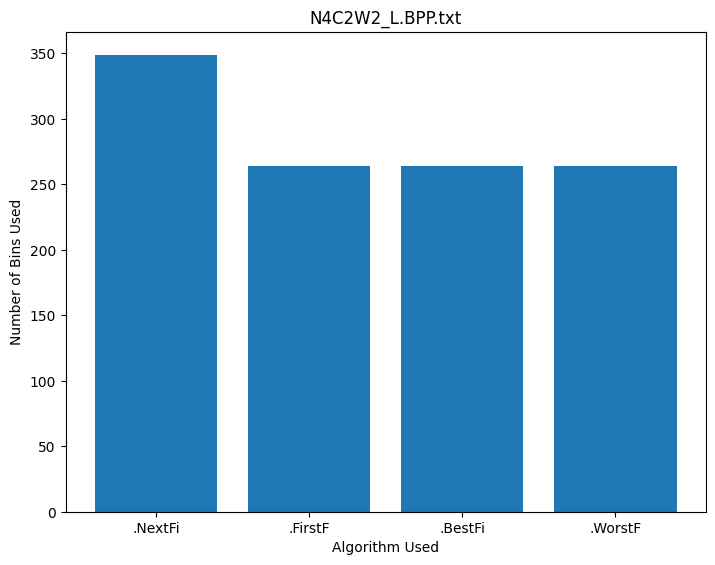

going to show


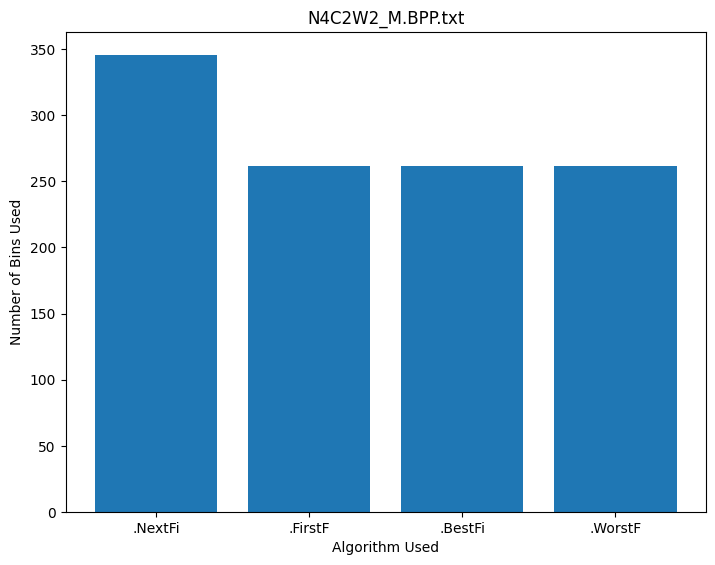

going to show


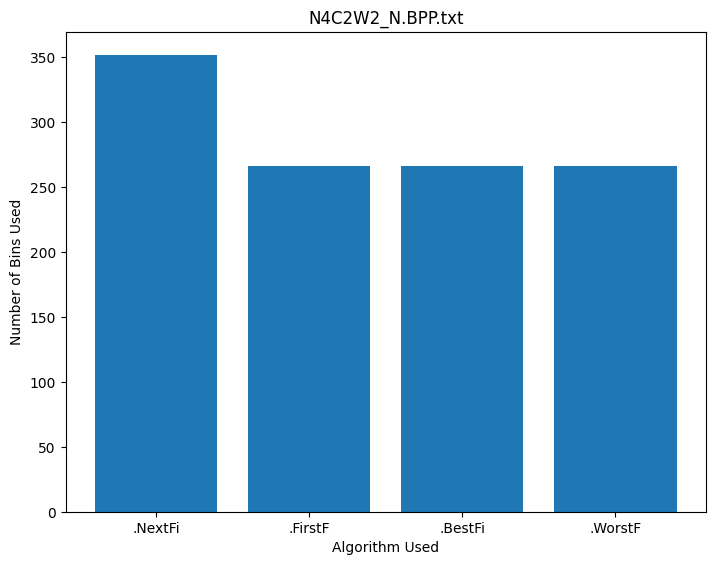

going to show


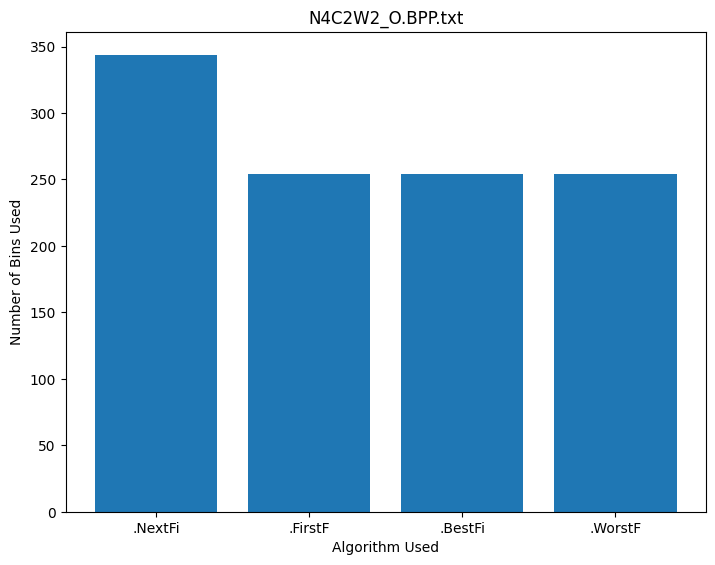

going to show


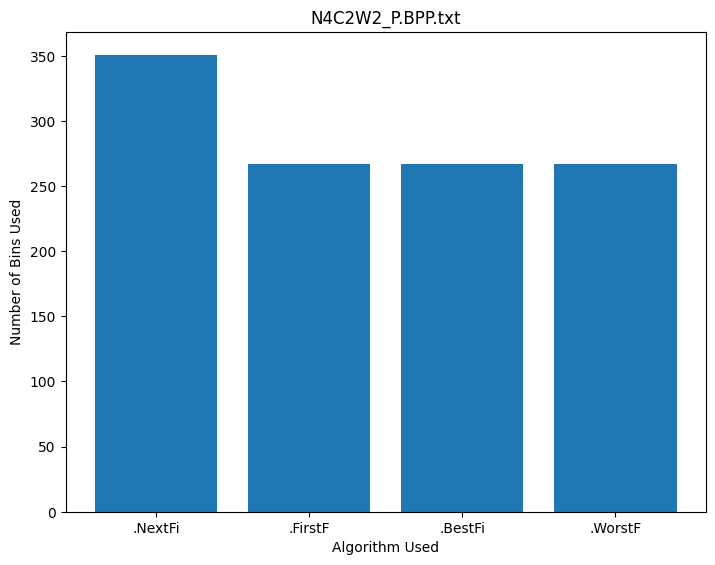

going to show


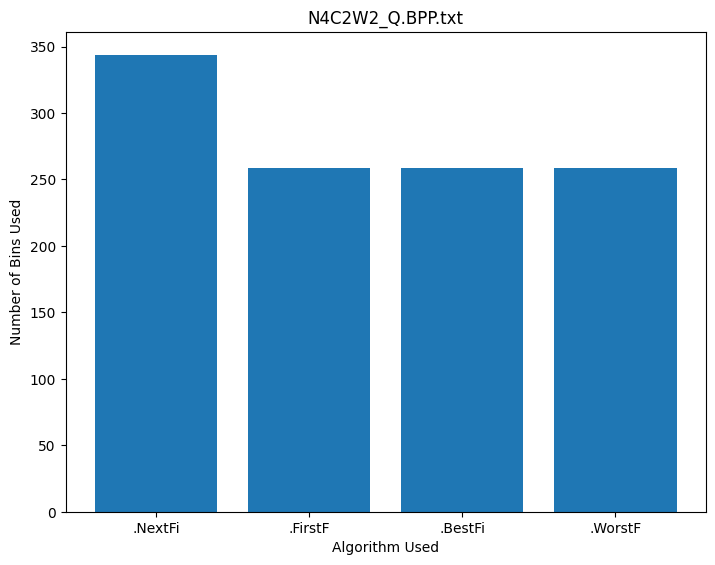

going to show


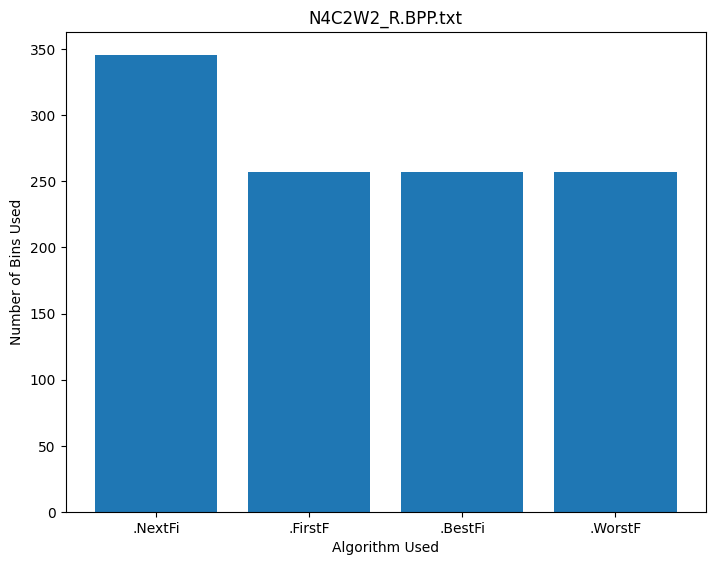

going to show


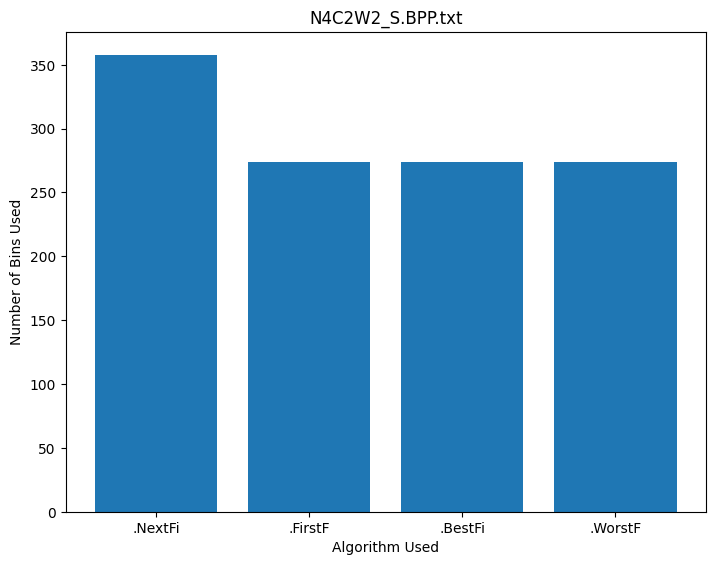

going to show


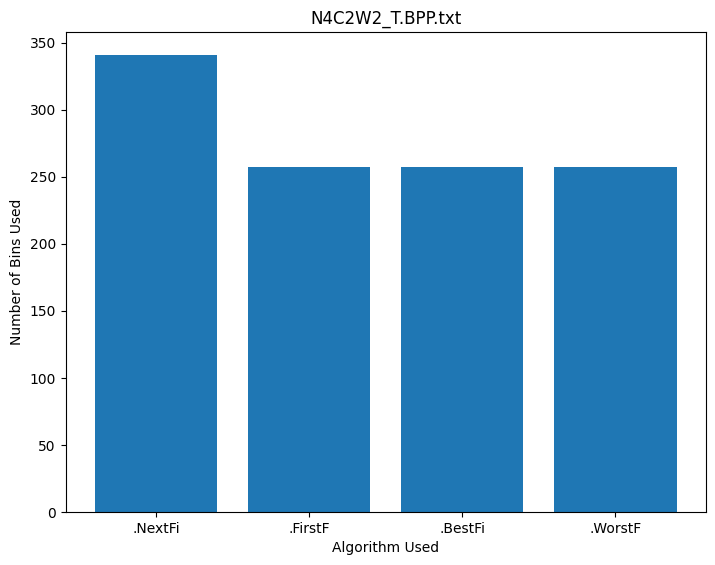

In [1]:
import bench_bins as bb
CASES = './_datasets/binpp/N4C2W2'
cases = bb.list_case_files(CASES)
alg1 = bb.generate_online_alg_list()
alg2 = bb.generate_offline_alg_list()
print('Running KPI benching for online algorithms:')
bb.run_online_bench(cases, alg1)
print('Running KPI benching for offline algorithms:')
bb.run_offline_bench(cases, alg2)

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)